In [1]:
from google.colab import drive
drive.mount('../content/drive')

Mounted at ../content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = '../content/drive/My Drive'
print(os.listdir(path))

['Classroom', 'skripsweet', 'datayoga', 'video', 'img', 'data', 'dataset', 'minced', 'Pneumonia', 'ontologi', 'dataset2', 'ontologi_tariJaipong3.owl', 'ontologi_tariJaipong4.owl', 'ontologi_tariJaipong5.owl', 'ontologi_tariJaipong2.owl', 'ontologi_tariJaipong.owl', 'File Tugas Akhir']


In [ ]:
## extracting frames

listing = os.listdir(path+'/video')
count=1
for vid in listing:
  vid = path+"/video/"+vid
  vidcap = cv2.VideoCapture(vid)
  def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) # mengatur video yang diambil pada posisi video di waktu tertentu, dengan mengatur pengambilan dalam waktu per millisecond
    hasFrames,image = vidcap.read()
    if hasFrames:
      cv2.imwrite(path+"/img/frame"+str(count)+".jpg", image) # menyimpan gambar ke file JPG
    return hasFrames
  sec = 0
  frameRate = 0.2 # frame rate disini adalah waktu untuk pengambilan gambar setiap 0.2 detik  
    
  success = getFrame(sec)
  while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [ ]:
## read dataset-sebelum cropping

def alldataset(img_data):
  img_dt = []
  img_label = []

  for dir in os.listdir(img_data):
    for file in os.listdir(os.path.join(img_data, dir)):
      img_path = os.path.join(img_data, dir, file)
      img = cv2.imread(img_path)
      img = cv2.resize(img, (img_width, img_height),  interpolation =cv2.INTER_LINEAR)

      img_dt.append(img)
      img_label.append(dir)
  return img_dt, img_label

In [ ]:
%%time
img_width = 550
img_height = 380
img_data = path + "/dataset/"
data, label = alldataset(img_data)

CPU times: user 2min 19s, sys: 6.44 s, total: 2min 25s
Wall time: 18min 19s


In [ ]:
lex = LabelEncoder()
lex.fit(label)
lbx = lex.transform(label)
lbx

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
data = np.asarray(data)

In [ ]:
lab = list(range(0,13))
idx = []
for b in range (len(lab)):
  for c in range (len(lbx)):
    if lab[b] == lbx[c]:
      idx.append(c)
      break
idx

[3150, 4200, 2800, 0, 1050, 350, 1400, 700, 1750, 2100, 3500, 2450, 3850]

In [3]:
#read dataset-setelah cropping

def dataset(img_data):
  img_dt = []
  img_label = []

  for dir in os.listdir(img_data):
    for file in os.listdir(os.path.join(img_data, dir)):
      img_path = os.path.join(img_data, dir, file)
      img = cv2.imread(img_path)

      img_dt.append(img)
      img_label.append(dir)
  return img_dt, img_label

In [5]:
%%time
img_data = path + "/dataset2/"
X, label = dataset(img_data)

CPU times: user 28 s, sys: 3.37 s, total: 31.4 s
Wall time: 16min 35s


In [6]:
#resize-data cropping

def resize(img_data):
  images = []
  for img in img_data:
    img = cv2.resize(img, (width, height), interpolation = cv2.INTER_LINEAR)
    images.append(img)
  images = np.asarray(images)
  return images

In [7]:
%%time
width = 64
height = 128
X2 = resize(X)

CPU times: user 450 ms, sys: 65.1 ms, total: 515 ms
Wall time: 526 ms


(-0.5, 63.5, 127.5, -0.5)

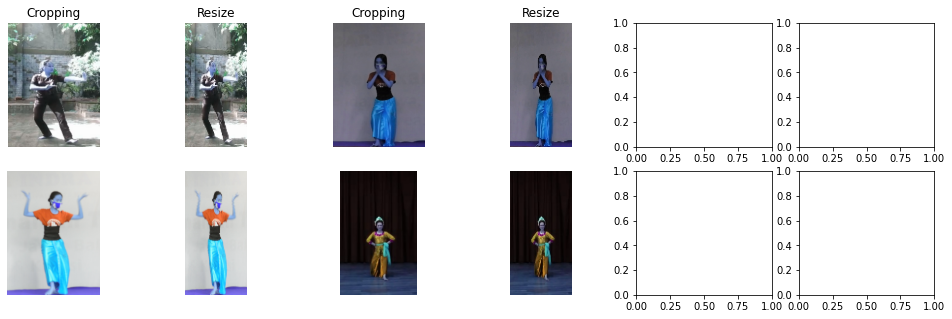

In [8]:
fig, ax = plt.subplots(2,6, figsize = (17,5))

ax[0,0].imshow(X[2310])
ax[0,0].axis('off')
ax[0,0].set_title('Cropping')
ax[0,1].imshow(X2[2310])
ax[0,1].axis('off')
ax[0,1].set_title('Resize')
ax[0,2].imshow(X[2530])
ax[0,2].axis('off')
ax[0,2].set_title('Cropping')
ax[0,3].imshow(X2[2530])
ax[0,3].axis('off')
ax[0,3].set_title('Resize')

ax[1,0].imshow(X[0])
ax[1,0].axis('off')
ax[1,1].imshow(X2[0])
ax[1,1].axis('off')
ax[1,2].imshow(X[633])
ax[1,2].axis('off')
ax[1,3].imshow(X2[633])
ax[1,3].axis('off')